IMPORT LIBRARIES FOR ML TRAINING

In [162]:
# Importing libraries
import pandas as pd                  # Pandas
import numpy as np                   # Numpy
from matplotlib import pyplot as plt # Matplotlib
import seaborn as sns                # Seaborn

# Package to implement Decision Tree Model
import sklearn
from sklearn.tree import DecisionTreeClassifier

from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import VotingClassifier

# Package for data partitioning
from sklearn.model_selection import train_test_split

# Package to visualize Decision Tree
from sklearn import tree

# Package for generating confusion matrix
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Package for generating classification report
from sklearn.metrics import classification_report

# PAckage for calculating f1 score
from sklearn.metrics import f1_score

# Module to save and load Python objects to and from files
import pickle 

%matplotlib inline

# Display inline plots as vector-based (svg)
%config InlineBackend.figure_formats = ['svg']

READ AND CLEAN DATA FOR TRAINING

In [163]:
# Load dataset as dataframe
health_df = pd.read_csv('fetal_health.csv')

#Change values of 1,2,3 of output to respective classification
health_df['fetal_health'] = health_df['fetal_health'].replace(1, 'Normal')
health_df['fetal_health'] = health_df['fetal_health'].replace(2, 'Suspect')
health_df['fetal_health'] = health_df['fetal_health'].replace(3, 'Pathological')

health_df.head()


,baseline value,accelerations,fetal_movement,uterine_contractions,light_decelerations,severe_decelerations,prolongued_decelerations,abnormal_short_term_variability,mean_value_of_short_term_variability,percentage_of_time_with_abnormal_long_term_variability,...,histogram_min,histogram_max,histogram_number_of_peaks,histogram_number_of_zeroes,histogram_mode,histogram_mean,histogram_median,histogram_variance,histogram_tendency,fetal_health
0,120.0,0.000,0.0,0.000,0.000,0.0,0.0,73.0,0.5,43.0,...,62.0,126.0,2.0,0.0,120.0,137.0,121.0,73.0,1.0,Suspect
1,132.0,0.006,0.0,0.006,0.003,0.0,0.0,17.0,2.1,0.0,...,68.0,198.0,6.0,1.0,141.0,136.0,140.0,12.0,0.0,Normal
2,133.0,0.003,0.0,0.008,0.003,0.0,0.0,16.0,2.1,0.0,...,68.0,198.0,5.0,1.0,141.0,135.0,138.0,13.0,0.0,Normal
3,134.0,0.003,0.0,0.008,0.003,0.0,0.0,16.0,2.4,0.0,...,53.0,170.0,11.0,0.0,137.0,134.0,137.0,13.0,1.0,Normal
4,132.0,0.007,0.0,0.008,0.000,0.0,0.0,16.0,2.4,0.0,...,53.0,170.0,9.0,0.0,137.0,136.0,138.0,11.0,1.0,Normal


In [164]:
# Output column for prediction
output = health_df['fetal_health'] 

# Input features 
features = health_df.drop(columns = ['fetal_health'])

# NO CATEGORICAL VARIABLES SO RUNNING DUMMIES DOES NOTHING
features_encoded = pd.get_dummies(features)

features_encoded.head()

,baseline value,accelerations,fetal_movement,uterine_contractions,light_decelerations,severe_decelerations,prolongued_decelerations,abnormal_short_term_variability,mean_value_of_short_term_variability,percentage_of_time_with_abnormal_long_term_variability,...,histogram_width,histogram_min,histogram_max,histogram_number_of_peaks,histogram_number_of_zeroes,histogram_mode,histogram_mean,histogram_median,histogram_variance,histogram_tendency
0,120.0,0.000,0.0,0.000,0.000,0.0,0.0,73.0,0.5,43.0,...,64.0,62.0,126.0,2.0,0.0,120.0,137.0,121.0,73.0,1.0
1,132.0,0.006,0.0,0.006,0.003,0.0,0.0,17.0,2.1,0.0,...,130.0,68.0,198.0,6.0,1.0,141.0,136.0,140.0,12.0,0.0
2,133.0,0.003,0.0,0.008,0.003,0.0,0.0,16.0,2.1,0.0,...,130.0,68.0,198.0,5.0,1.0,141.0,135.0,138.0,13.0,0.0
3,134.0,0.003,0.0,0.008,0.003,0.0,0.0,16.0,2.4,0.0,...,117.0,53.0,170.0,11.0,0.0,137.0,134.0,137.0,13.0,1.0
4,132.0,0.007,0.0,0.008,0.000,0.0,0.0,16.0,2.4,0.0,...,117.0,53.0,170.0,9.0,0.0,137.0,136.0,138.0,11.0,1.0


CREATING ML MODELS

In [165]:
# Data partitioning into training and testing
train_X_t, test_X_t, train_y_t, test_y_t = train_test_split(features_encoded, output, test_size = 0.2, random_state = 1) 

DECISION TREE MODEL

In [166]:
# Defining prediction model
clf = DecisionTreeClassifier(random_state = 1)

# Fitting model on training data
clf.fit(train_X_t, train_y_t)

# Predictions on test set
y_pred = clf.predict(test_X_t)


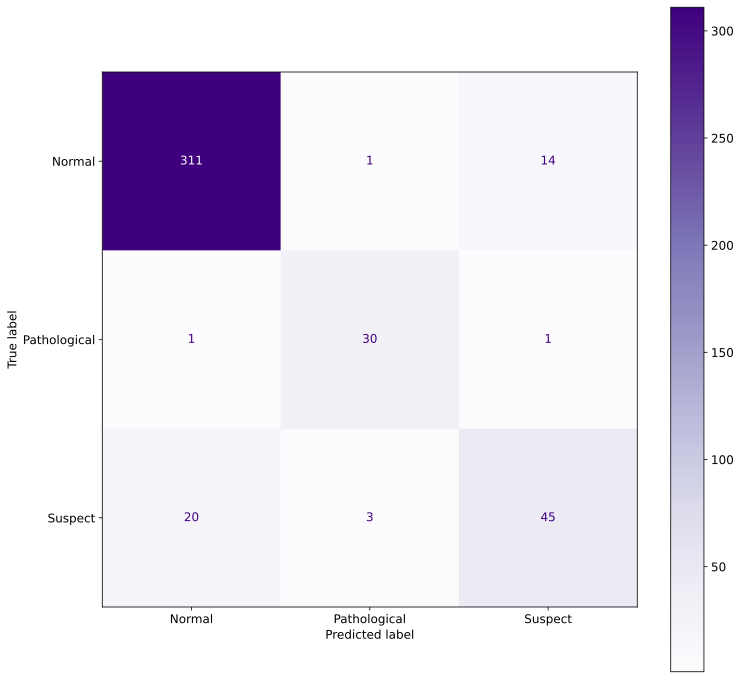

In [167]:
# CONFUSION MATRIX
cm = confusion_matrix(test_y_t, y_pred, labels = clf.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix = cm, display_labels = clf.classes_)

# Specify figure size
fig, ax = plt.subplots(figsize = (12, 12))
plt.rcParams.update({'font.size': 12})

# Display Confusion Matrix
disp.plot(cmap = 'Purples', ax = ax);

# Save the plot as an SVG file
plt.savefig("confusion_mat_dt.svg", format="svg")

In [168]:
# Classification Report
report = classification_report(test_y_t, y_pred, output_dict = True)
report_df = pd.DataFrame(report)

# Save the report as a CSV File
report_df.to_csv('class_report_health_tree.csv') 

report_df


,Normal,Pathological,Suspect,accuracy,macro avg,weighted avg
precision,0.936747,0.882353,0.750000,0.906103,0.856367,0.902852
recall,0.953988,0.937500,0.661765,0.906103,0.851084,0.906103
f1-score,0.945289,0.909091,0.703125,0.906103,0.852502,0.903914
support,326.000000,32.000000,68.000000,0.906103,426.000000,426.000000


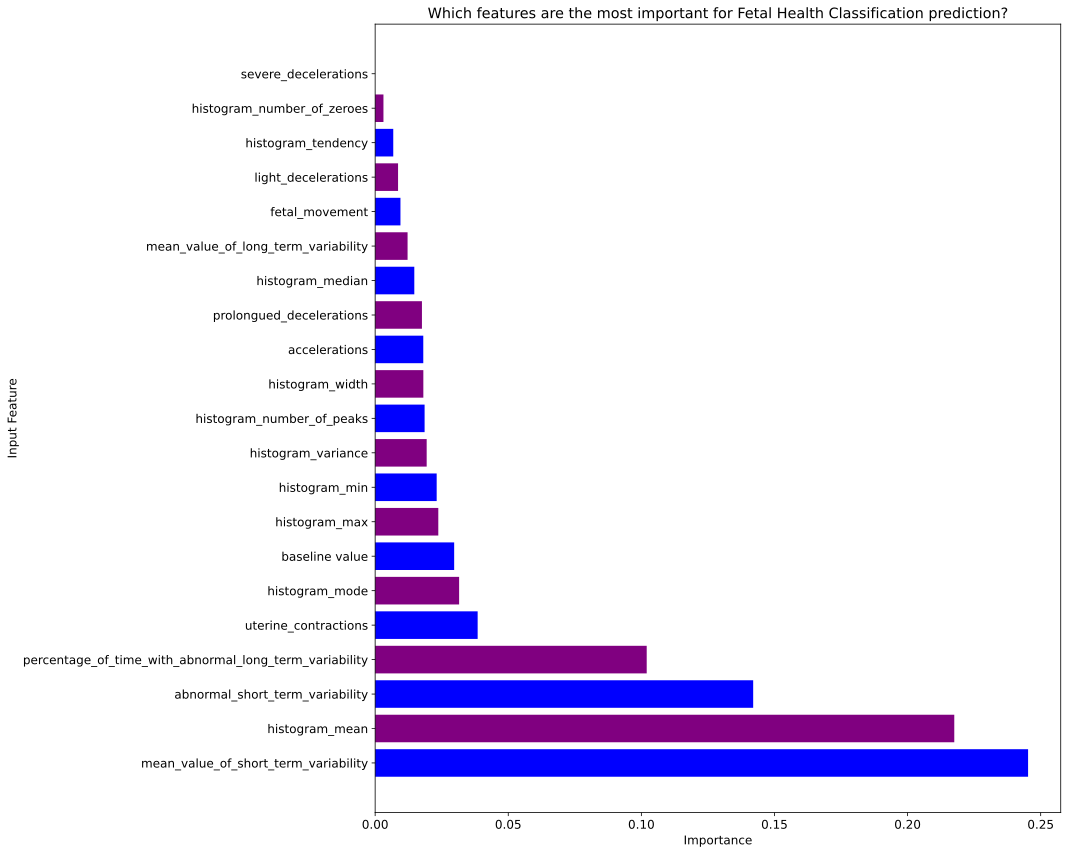

In [169]:
# FEATURE IMPORTANCE
importance = clf.feature_importances_

# Storing feature importance as a dataframe
feature_imp_dt = pd.DataFrame(list(zip(train_X_t.columns, importance)),
               columns = ['Feature', 'Importance'])

feature_imp_dt_sort = feature_imp_dt.sort_values('Importance', ascending = False).reset_index(drop = True)

# Bar plot
plt.figure(figsize=(15, 12))
plt.barh(feature_imp_dt_sort['Feature'], feature_imp_dt_sort['Importance'], color = ['blue', 'purple'])

plt.xlabel("Importance")
plt.ylabel("Input Feature")
plt.title('Which features are the most important for Fetal Health Classification prediction?') 
plt.tight_layout()
plt.savefig("feature_imp_health_tree.svg");

RANDOM FOREST MODEL

In [170]:
# Data partitioning into training and testing
train_X_rf, test_X_rf, train_y_rf, test_y_rf = train_test_split(features_encoded, output, test_size = 0.2, random_state = 1) 

# Defining prediction model
clf2 = RandomForestClassifier(random_state = 1)

# Fitting model on training data
clf2.fit(train_X_rf, train_y_rf)

# Predictions on test set
y_pred_rf = clf2.predict(test_X_rf)

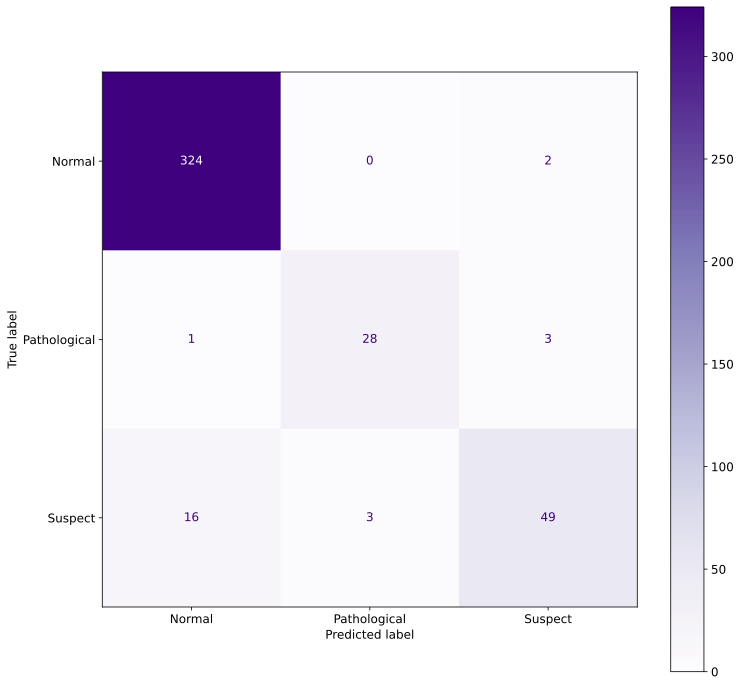

In [171]:
# CONFUSION MATRIX
cm = confusion_matrix(test_y_rf, y_pred_rf, labels = clf2.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix = cm, display_labels = clf2.classes_)

# Specify figure size
fig, ax = plt.subplots(figsize = (12, 12))
plt.rcParams.update({'font.size': 12})

# Display Confusion Matrix
disp.plot(cmap = 'Purples', ax = ax);

# Save the plot as an SVG file
plt.savefig("confusion_mat_rf.svg", format="svg")

In [172]:
# Classification Report
report = classification_report(test_y_rf, y_pred_rf, output_dict = True)
report_df = pd.DataFrame(report)
report_df

# Save the report as a CSV File
report_df.to_csv('class_report_health_rf.csv') 
report_df

,Normal,Pathological,Suspect,accuracy,macro avg,weighted avg
precision,0.950147,0.903226,0.907407,0.941315,0.920260,0.939800
recall,0.993865,0.875000,0.720588,0.941315,0.863151,0.941315
f1-score,0.971514,0.888889,0.803279,0.941315,0.887894,0.938453
support,326.000000,32.000000,68.000000,0.941315,426.000000,426.000000


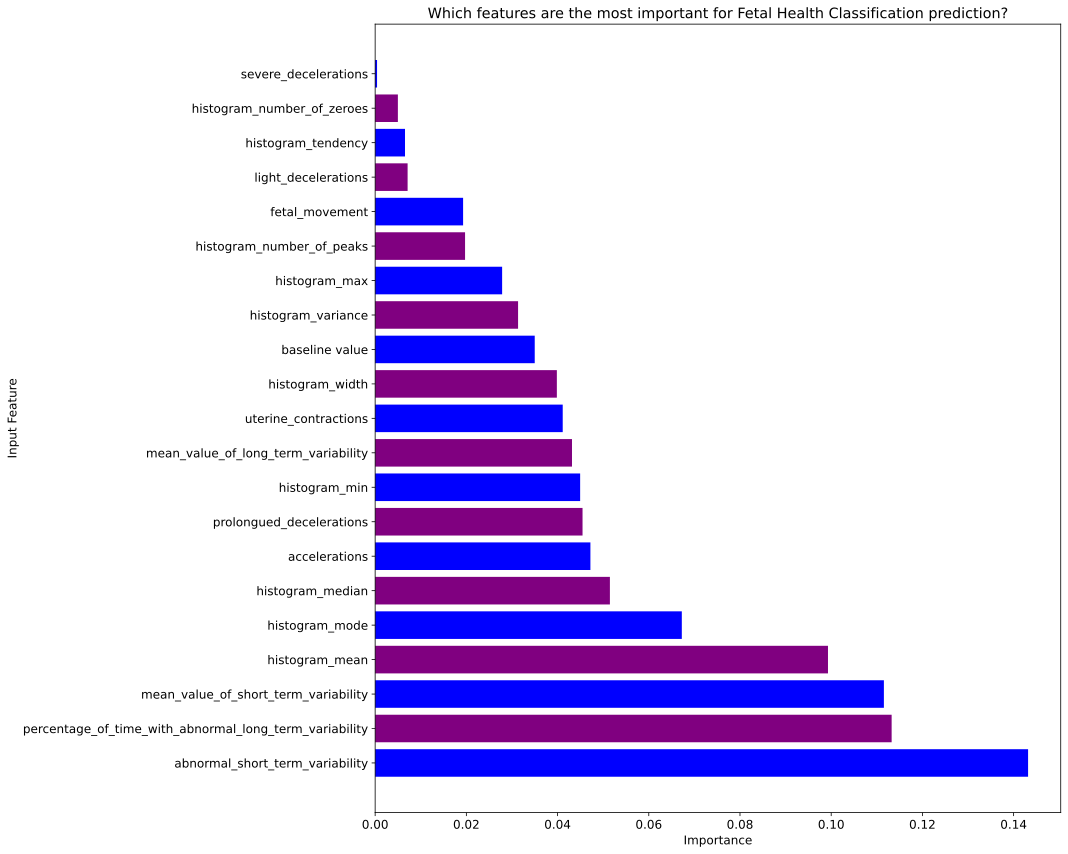

In [173]:
# FEATURE IMPORTANCE
# Storing importance values from the trained model
importance = clf2.feature_importances_

# Storing feature importance as a dataframe
feature_imp_rf = pd.DataFrame(list(zip(train_X_rf.columns, importance)),
               columns = ['Feature', 'Importance'])

feature_imp_rf_sort = feature_imp_rf.sort_values('Importance', ascending = False).reset_index(drop = True)

# Bar plot
plt.figure(figsize=(15, 12))
plt.barh(feature_imp_rf_sort['Feature'], feature_imp_rf_sort['Importance'], color = ['blue', 'purple'])

plt.xlabel("Importance")
plt.ylabel("Input Feature")
plt.title('Which features are the most important for Fetal Health Classification prediction?') 
plt.tight_layout()
plt.savefig("feature_imp_health_rf.svg");

ADABOOST MODEL

In [174]:
# Data partitioning into training and testing
train_X_ada, test_X_ada, train_y_ada, test_y_ada = train_test_split(features_encoded, output, test_size = 0.2, random_state = 1) 

# Defining prediction model
clf3 = AdaBoostClassifier(estimator=None, n_estimators=50, learning_rate=1.0, random_state=1)

# Fitting model on training data
clf3.fit(train_X_ada, train_y_ada)

# Predictions on test set
y_pred_ada = clf3.predict(test_X_ada)

c:\Users\jakeh\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


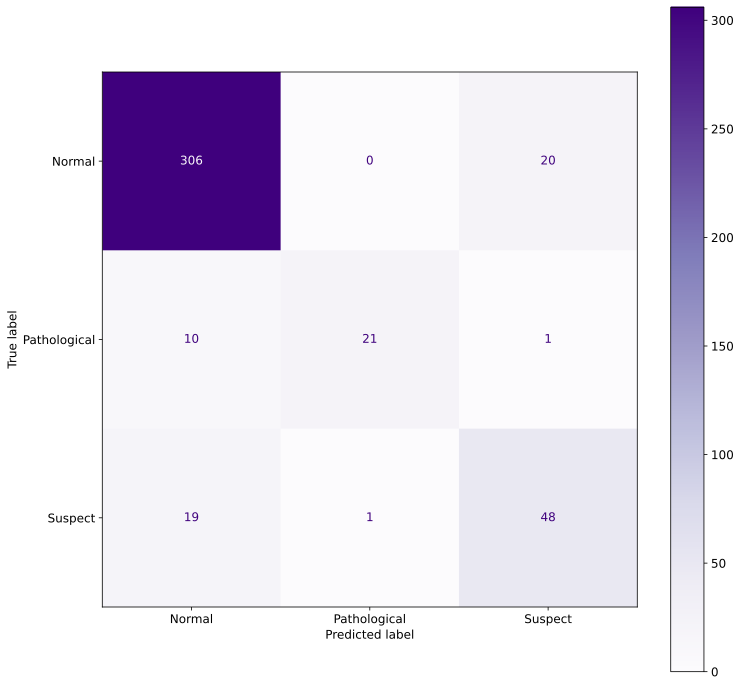

In [175]:
# CONFUSION MATRIX
cm = confusion_matrix(test_y_ada, y_pred_ada, labels = clf3.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix = cm, display_labels = clf3.classes_)

# Specify figure size
fig, ax = plt.subplots(figsize = (12, 12))
plt.rcParams.update({'font.size': 12})

# Display Confusion Matrix
disp.plot(cmap = 'Purples', ax = ax);

# Save the plot as an SVG file
plt.savefig("confusion_mat_ada.svg", format="svg")

In [176]:
# Classification Report
report = classification_report(test_y_ada, y_pred_ada, output_dict = True)
report_df_ada = pd.DataFrame(report)


# Save the report as a CSV File
report_df_ada.to_csv('class_report_health_ada.csv') 
report_df_ada

,Normal,Pathological,Suspect,accuracy,macro avg,weighted avg
precision,0.913433,0.954545,0.695652,0.880282,0.854543,0.881758
recall,0.938650,0.656250,0.705882,0.880282,0.766928,0.880282
f1-score,0.925870,0.777778,0.700730,0.880282,0.801459,0.878808
support,326.000000,32.000000,68.000000,0.880282,426.000000,426.000000


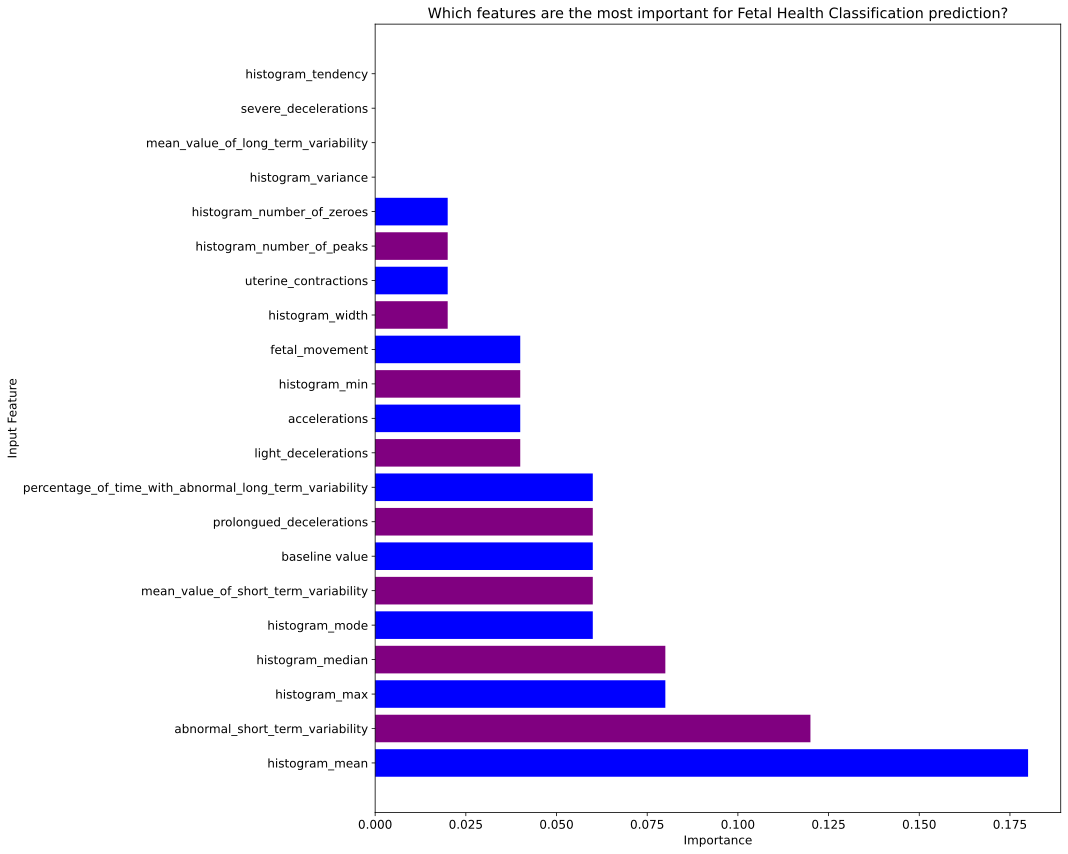

In [177]:
# FEATURE IMPORTANCE
# Storing importance values from the trained model
importance = clf3.feature_importances_

# Storing feature importance as a dataframe
feature_imp_ada = pd.DataFrame(list(zip(train_X_ada.columns, importance)),
               columns = ['Feature', 'Importance'])

feature_imp_ada_sort = feature_imp_ada.sort_values('Importance', ascending = False).reset_index(drop = True)

# Bar plot
plt.figure(figsize=(15, 12))
plt.barh(feature_imp_ada_sort['Feature'], feature_imp_ada_sort['Importance'], color = ['blue', 'purple'])

plt.xlabel("Importance")
plt.ylabel("Input Feature")
plt.title('Which features are the most important for Fetal Health Classification prediction?') 
plt.tight_layout()
plt.savefig("feature_imp_health_ada.svg");

SOFT VOTING CLASSIFIER 

In [178]:
# Data partitioning into training and testing
train_X_vote, test_X_vote, train_y_vote, test_y_vote = train_test_split(features_encoded, output, test_size = 0.2, random_state = 1)


# Define Models To be used for soft voting classifier
clf_tree = DecisionTreeClassifier(random_state = 1)
clf_rf = RandomForestClassifier(random_state = 1)
clf_ada = AdaBoostClassifier(estimator=None, n_estimators=50, learning_rate=1.0, random_state=1)


In [179]:
# CALCULATE WEIGHTS OF EACH MODEL USING F1 MACRO SCORE

# ***UTILIZED CHAT GPT FOR HELP WITH SYNTAX FOR FINDING F1 SCORES***

#Create variables for f1 scores and models
f1_scores = []
models = [clf_tree, clf_rf, clf_ada]

#Calculate f1 score for each model
for model in models:
    model.fit(train_X_vote,train_y_vote)
    y_pred = model.predict(test_X_vote)
    f1 = f1_score(test_y_vote, y_pred, average='macro')
    f1_scores.append(f1)

normalized_f1 = f1_scores / sum(f1_scores)

weight = [normalized_f1[0], normalized_f1[1], normalized_f1[2]]

weight

c:\Users\jakeh\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[0.33538563644159547, 0.3493094794857359, 0.3153048840726687]

In [180]:
# Call voting classifier
clf_soft_vote = VotingClassifier(estimators=[('dt', clf_tree), ('rf', clf_rf), ('ada', clf_ada)], voting='soft', weights = weight)

# Fitting model on training data
clf_soft_vote.fit(train_X_vote, train_y_vote)

# Predictions on test set
y_pred_vote = clf_soft_vote.predict(test_X_vote)

c:\Users\jakeh\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


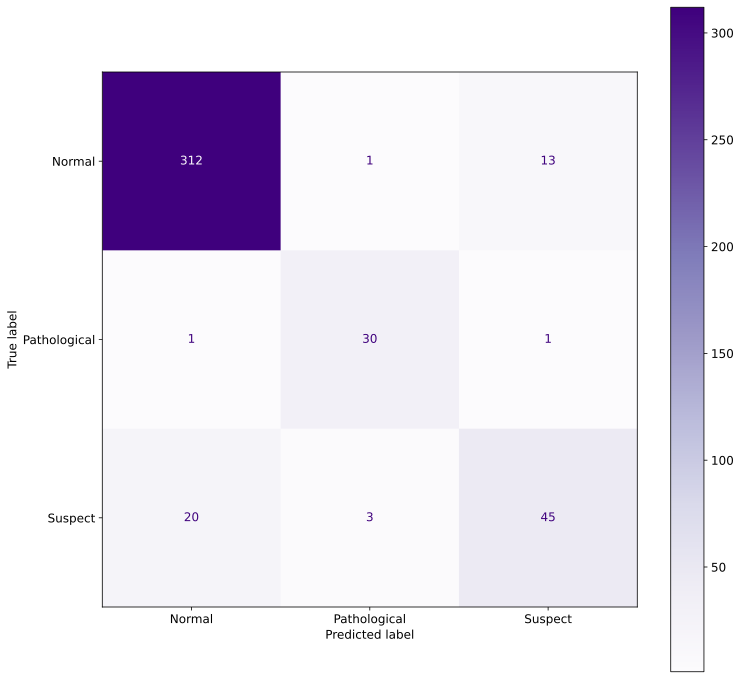

In [181]:
# CONFUSION MATRIX
cm = confusion_matrix(test_y_vote, y_pred_vote, labels = clf_soft_vote.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix = cm, display_labels = clf_soft_vote.classes_)

# Specify figure size
fig, ax = plt.subplots(figsize = (12, 12))
plt.rcParams.update({'font.size': 12})

# Display Confusion Matrix
disp.plot(cmap = 'Purples', ax = ax);

# Save the plot as an SVG file
plt.savefig("confusion_mat_soft.svg", format="svg")

In [182]:
# Classification Report
report = classification_report(test_y_vote, y_pred_vote, output_dict = True)
report_df_vote = pd.DataFrame(report)


# Save the report as a CSV File
report_df_vote.to_csv('class_report_health_vote.csv') 
report_df_vote

,Normal,Pathological,Suspect,accuracy,macro avg,weighted avg
precision,0.936937,0.882353,0.762712,0.908451,0.860667,0.905026
recall,0.957055,0.937500,0.661765,0.908451,0.852107,0.908451
f1-score,0.946889,0.909091,0.708661,0.908451,0.854881,0.906023
support,326.000000,32.000000,68.000000,0.908451,426.000000,426.000000


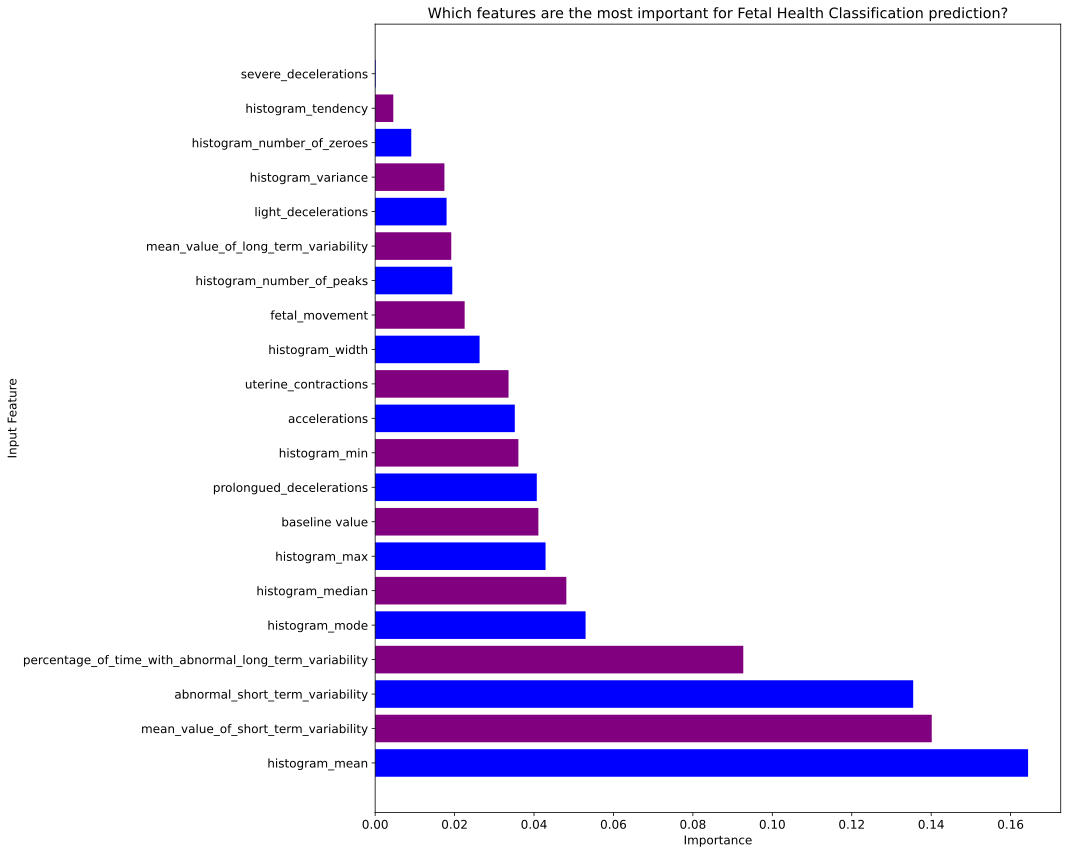

In [183]:
# Feature Importance 

# Calculate Weighted Feature Importance for Soft Voting Classifier:

#Create dataframe with feature and the associated importance for each model
weight_feature = feature_imp_dt.rename(columns = {'Importance': 'Importance_dt'})

weight_feature['Importance_rf'] = feature_imp_rf['Importance']
weight_feature['Importance_ada'] = feature_imp_ada['Importance']

# Create new column with weighted importance
weight_feature['Weighted_Importance'] = (weight[0] * weight_feature['Importance_dt'] + weight[1] * weight_feature['Importance_rf'] +
                                         weight[2] * weight_feature['Importance_ada'])

#Drop columns with indiviudal importances
weight_feature.drop(columns = ['Importance_dt', 'Importance_rf', 'Importance_ada'])

feature_imp_weight = weight_feature.sort_values('Weighted_Importance', ascending = False).reset_index(drop = True)

# Bar plot
plt.figure(figsize=(15, 12))
plt.barh(feature_imp_weight['Feature'], feature_imp_weight['Weighted_Importance'], color = ['blue', 'purple'])

plt.xlabel("Importance")
plt.ylabel("Input Feature")
plt.title('Which features are the most important for Fetal Health Classification prediction?') 
plt.tight_layout()
plt.savefig("feature_imp_health_vote.svg");


SAVE MODELS USING PICKLE 

In [184]:
# Pickle file: saving the trained DT model
# Creating the file where we want to write the model

#DECISION TREE
dt_pickle_tree = open('decision_tree_health.pickle', 'wb') 

# Write DT model to the file
pickle.dump(clf, dt_pickle_tree) 

# Close the file
dt_pickle_tree.close() 

#RANDOM FOREST
dt_pickle_rf = open('random_forest_health.pickle', 'wb') 

# Write DT model to the file
pickle.dump(clf2, dt_pickle_rf) 

# Close the file
dt_pickle_rf.close() 

#ADABOOST
dt_pickle_ada = open('AdaBoost_health.pickle', 'wb') 

# Write DT model to the file
pickle.dump(clf3, dt_pickle_ada) 

# Close the file
dt_pickle_ada.close() 

#SOFT VOTE
dt_pickle_soft = open('SoftVote_health.pickle', 'wb') 

# Write DT model to the file
pickle.dump(clf_soft_vote, dt_pickle_soft) 

# Close the file
dt_pickle_soft.close() 